## Exploration

train.csv shape is  (1697533, 6)
test.csv shape is  (212192, 2)

        Id   ProductId          UserId  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4   
1   354887  6303079709  A2I8RXJN80A2D2   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY   
4   475323  630574453X  A13NM1PES9OXVN   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays with you   

                                                Text  Score  
0  While most straight to DVD films are not worth...    5.0  
1  I have wanted this one for sometime, also.  I ...    5.0  
2  Actually this was a pretty darn good indie fil...    4.0  
3  Episodes 37 to 72 of the series press on in a ...    5.0  
4  I was really impressed with this movie, but wa...    3.0

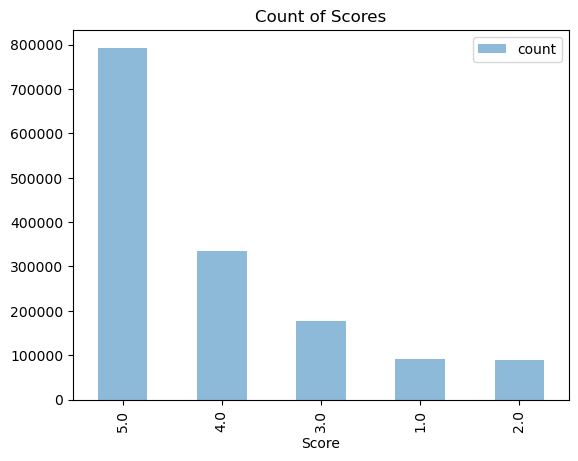

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Scores")
plt.show()

In [2]:
test_ids = list(testingSet['Id'])

In [3]:
test_df = trainingSet[trainingSet['Id'].isin(test_ids)].reset_index().drop(columns='index')

In [4]:
test_df.head()

,Id,ProductId,UserId,Summary,Text,Score
0,1323432,B0034G4P30,A120UTHQDQIJGH,Okay for a rental,This movie was just alright for me. I think pe...,NaN
1,1137299,B0012IWO0I,A3SJBFCTJWBFT2,Great for kids,My kids love this movie. Exciting and fun to ...,NaN
2,1459366,B005FUTBSC,A1V6FRU7EXP6N9,good movie,"The effects were good, not the best but far fr...",NaN
3,931601,B000AREXBU,ARXDDR76Z5Q2I,Excellent quality dvd. Don't pay big bucks fo...,"I just got a copy of this S. Korean dvd of ""He...",NaN
4,1311995,B002ZG99B8,A2XAS9GVZL3B1,A mixed review,"OK, to put this clearly and bluntly... if you ...",NaN


In [5]:
test_df = test_df.drop(columns='Score')
test_df.isna().sum()

Id           0
ProductId    0
UserId       0
Summary      4
Text         8
dtype: int64

In [7]:
test_df['Text'].fillna("", inplace=True)
test_df['Summary'].fillna("", inplace=True)
test_df.isna().sum()

Id           0
ProductId    0
UserId       0
Summary      0
Text         0
dtype: int64

In [12]:
test_df['Summary and Text'] = test_df['Summary'].astype(str) + test_df['Text'].astype(str)

In [13]:
train_df = trainingSet[~trainingSet['Id'].isin(test_ids)].reset_index().drop(columns='index')

In [14]:
train_df.head()

,Id,ProductId,UserId,Summary,Text,Score
0,914403,B0009W5KHM,AV6QDP8Q0ONK4,GOOD FUN FILM,While most straight to DVD films are not worth...,5.0
1,354887,6303079709,A2I8RXJN80A2D2,Movie Review,"I have wanted this one for sometime, also. I ...",5.0
2,1407653,B004H0M2XC,A3FHV3RV8Z12E6,When is it a good time to Consent?,Actually this was a pretty darn good indie fil...,4.0
3,1377458,B003ZJ9536,A12VLTA3ZHVPUY,TRUTH,Episodes 37 to 72 of the series press on in a ...,5.0
4,475323,630574453X,A13NM1PES9OXVN,Intelligent and bittersweet -- stays with you,"I was really impressed with this movie, but wa...",3.0


In [15]:
train_df = train_df.dropna()

In [17]:
train_df['Summary and Text'] = train_df['Summary'].astype(str) + train_df['Text'].astype(str)

In [18]:
train_df.isnull().sum()

Id                  0
ProductId           0
UserId              0
Summary             0
Text                0
Score               0
Summary and Text    0
dtype: int64

In [19]:
train_df.dtypes

Id                    int64
ProductId            object
UserId               object
Summary              object
Text                 object
Score               float64
Summary and Text     object
dtype: object

In [20]:
mini_train = train_df.sample(n=10000, random_state=42).copy()

In [21]:
mini_train.head()

,Id,ProductId,UserId,Summary,Text,Score,Summary and Text
327337,1035185,B000KLQUV2,A3GUZIX0ITZORF,"""Just say, 'NO' to Jesus""","Like most of the other reviewers here say, thi...",5.0,"""Just say, 'NO' to Jesus""Like most of the othe..."
276864,431435,6304680724,A26BWRBPP4V2WF,Future events such as these will affect you in...,There are two kinds of bad movies - the kind t...,4.0,Future events such as these will affect you in...
904589,1413559,B004LROMWU,A10CRY9MFXE3HH,It's OK,It certainly a watchable series and I'm rootin...,3.0,It's OKIt certainly a watchable series and I'm...
382585,535298,B00003CXS4,A34974VMNZKRAT,Brilliant,You may not be a Brad Pitt fan. That's okay! ...,5.0,BrilliantYou may not be a Brad Pitt fan. That...
878200,1392921,B004A8ZX32,AHCA0TKJE4MFL,Takes More than One Viewing,"I must confess, at the outset, that I am a big...",5.0,"Takes More than One ViewingI must confess, at ..."


In [22]:
i = 3
mini_train.iloc[i]['Summary'], mini_train.iloc[i]['Text']

('Brilliant',
 "You may not be a Brad Pitt fan.  That's okay!  You barely recognize him here.  The rest of the actors are not well known in American cinema, though almost all are famous in the UK (even if it isn't for their acting).  The movie is very similar in pacing and style to Guy Ritchie's earlier movie Lock, Stock, and Two Smoking Barrels, but the characters and situations are just as funny and feel fresh.  I laughed so hard while watching this film, the twelve times I saw it.  Thoroughly enjoyable!")

C:\Users\akhil\AppData\Local\Temp\ipykernel_25100\776576175.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=train_df, palette='viridis')


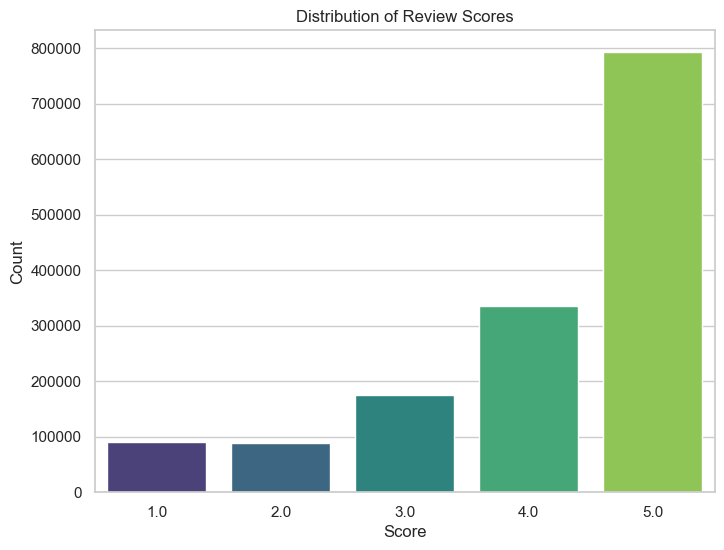

In [15]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Quick glance at the data
# print(df.head())
# print(df.info())
# print(df.describe())

# Setting plot style
sns.set(style="whitegrid")

# 1. Score Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=train_df, palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()



## Creating your model

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [24]:
vectorizer = TfidfVectorizer(max_features=5000)

X_tfidf = vectorizer.fit_transform(mini_train['Summary and Text'])

In [25]:

X_train, X_val, y_train, y_val = train_test_split(X_tfidf, mini_train['Score'], test_size=0.2, random_state=42)

In [26]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Predictions & evaluation
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         1.0       0.71      0.31      0.44       124
         2.0       0.31      0.03      0.06       131
         3.0       0.38      0.19      0.26       216
         4.0       0.44      0.28      0.34       491
         5.0       0.63      0.92      0.75      1038

    accuracy                           0.59      2000
   macro avg       0.49      0.35      0.37      2000
weighted avg       0.54      0.59      0.53      2000



# Fine Tuning

In [ ]:
...

# Evaluation

In [ ]:
Y_train_pred = model.predict(X_train)
print("Accuracy on training set = ", accuracy_score(Y_train, Y_train_pred))
Y_test_pred = model.predict(X_test)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_pred))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Create the Kaggle submission

In [28]:
tf_idf = vectorizer.fit_transform(train_df['Summary and Text'])

In [29]:
y = train_df['Score']
X_test = vectorizer.transform(test_df['Summary and Text'])

In [30]:
test_df.head()

,Id,ProductId,UserId,Summary,Text,Summary and Text
0,1323432,B0034G4P30,A120UTHQDQIJGH,Okay for a rental,This movie was just alright for me. I think pe...,Okay for a rentalThis movie was just alright f...
1,1137299,B0012IWO0I,A3SJBFCTJWBFT2,Great for kids,My kids love this movie. Exciting and fun to ...,Great for kidsMy kids love this movie. Exciti...
2,1459366,B005FUTBSC,A1V6FRU7EXP6N9,good movie,"The effects were good, not the best but far fr...","good movieThe effects were good, not the best ..."
3,931601,B000AREXBU,ARXDDR76Z5Q2I,Excellent quality dvd. Don't pay big bucks fo...,"I just got a copy of this S. Korean dvd of ""He...",Excellent quality dvd. Don't pay big bucks fo...
4,1311995,B002ZG99B8,A2XAS9GVZL3B1,A mixed review,"OK, to put this clearly and bluntly... if you ...","A mixed reviewOK, to put this clearly and blun..."


In [31]:
clf.fit(tf_idf, y)
y_pred = clf.predict(X_test)
test_df['Score'] = y_pred
submission = test_df[['Id', 'Score']]
submission.to_csv("submission.csv", index=False)

Now you can upload the `submission.csv` to kaggle